Since I will be collecting my data via a Wikipedia API/Libraries, the one I'm using here is from the page titled "List of United States cities by population", for which the code calling it is written below.

Here's the link to the page: https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population

In [1]:
pip install wikipedia-api

First, install the required package to access the data via API/Libraries on Wikipedia.

In [2]:
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('Coding Assignment: Data Curation and Analysis (keegan.fleigner@gmail.com)', 'en')

page_py = wiki_wiki.page('List of United States cities by population')

Second, import the API/Libraries using the title of the Wikipedia page and indentify the title of this project (Coding Assignment: Data Curation and Analysis) as well as the language required (English = "en")

In [3]:
import requests

url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
headers = {'User-Agent': 'List of United States cities by population/0.0 (https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population; keegan.fleigner@gmail.com)'}

response = requests.get(url, headers=headers)

This is another way to import the data, which can be helpful to ensure that none is lost in the process.

In [4]:
def print_sections(sections, level=0):
        for s in sections:
                print("%s: %s - %s" % ("*" * (level + 1), s.title, s.text[0:40]))
                print_sections(s.sections, level + 1)


print_sections(page_py.sections)

*: 50 states and Washington, D.C. - This table lists the 333 incorporated pl
**: Distribution - The total 2020 enumerated population of 
**: Gallery - 
*: Puerto Rico - The following table lists the five munic
*: Other U.S. territories - As of 2023, four U.S. territories — Amer
*: Census-designated places - The following table lists U.S. census-de
*: Cities formerly over 100,000 people - The following table lists U.S. cities th
*: Locations of 50 most populous cities - 
*: See also - Demographics of the United States
Larges
*: Notes - 
*: References - 
*: External links - 
United States Government
United States 


Now that the data has been imported, it's good to first print out the sections from the Wikipedia page to confirm that this was a success, though only the first few text characters are necessary to see.

In [5]:
section_history = page_py.section_by_title('50 states and Washington, D.C.')
print("%s - %s" % (section_history.title, section_history.text[0:40]))

50 states and Washington, D.C. - This table lists the 333 incorporated pl


Once the page is confirmed to have been imported intact, it's then good to check the individual section that contains the data being intended for use here.

In [6]:
pip install beautifulsoup4

Now that the data has been imported and found, it's time to clean it, first by installing the package to do it.

In [7]:
from bs4 import BeautifulSoup
import pandas as pd

Make sure to import pandas for reading and converting the data to a csv before and after its been cleaned.

In [8]:
wikiurl="https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population"
table_class="wikitable sortable jquery-tablesorter"
response2=requests.get(wikiurl)
print(response2.status_code)

200


Before reading the data, run a test of the status code to make sure it's okay to use it.

In [9]:
soup = BeautifulSoup(response2.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable sortable"})

Now that the data has been cleared, it's time to scrape it from the Wikipedia page.

In [10]:
df=pd.read_html(str(indiatable))
df=pd.DataFrame(df[0])
print(df.head())

   2022 rank         City    State[c]  2022 estimate  2020 census  Change  \
0          1  New York[d]    New York        8335897      8804190  −5.32%   
1          2  Los Angeles  California        3822238      3898747  −1.96%   
2          3      Chicago    Illinois        2665039      2746388  −2.96%   
3          4      Houston       Texas        2302878      2304580  −0.07%   
4          5      Phoenix     Arizona        1644409      1608139  +2.26%   

  2020 land area 2020 land area.1 2020 population density  \
0    300.5 sq mi        778.3 km2            29,298/sq mi   
1    469.5 sq mi      1,216.0 km2             8,304/sq mi   
2    227.7 sq mi        589.7 km2            12,061/sq mi   
3    640.4 sq mi      1,658.6 km2             3,599/sq mi   
4    518.0 sq mi      1,341.6 km2             3,105/sq mi   

  2020 population density.1                                           Location  
0                11,312/km2  .mw-parser-output .geo-default,.mw-parser-outp...  
1       

Once the data's been scraped, print it out to confirm this.

In [11]:
df.to_csv('largest_us_cities_raw.csv')

After confirmation that the raw data has been thoroughly scraped, make a csv of it as a copy for your records in case the processed data encoutners any issues.

In [14]:
data = df.drop(["2022 rank", "State[c]", "Location"], axis=1)
data = data.rename(columns={"2022 estimate": "Population (2022)", "2020 census": "Population (2020)", "2020 land area": "Land Area (sq mi)", "2020 population density": "Population Density (sq mi)", "2020 land area.1": "Land Area (km2)", "2020 population density.1": "Population Density (km2)"})
data.info

<bound method DataFrame.info of             City  Population (2022)  Population (2020)  Change  \
0    New York[d]            8335897            8804190  −5.32%   
1    Los Angeles            3822238            3898747  −1.96%   
2        Chicago            2665039            2746388  −2.96%   
3        Houston            2302878            2304580  −0.07%   
4        Phoenix            1644409            1608139  +2.26%   
..           ...                ...                ...     ...   
328       Albany             100826              99224  +1.61%   
329     Hesperia             100744              99818  +0.93%   
330  New Bedford             100682             101079  −0.39%   
331    Davenport             100486             101724  −1.22%   
332    Daly City             100007             104901  −4.67%   

    Land Area (sq mi) Land Area (km2) Population Density (sq mi)  \
0         300.5 sq mi       778.3 km2               29,298/sq mi   
1         469.5 sq mi     1,216.0 km2  

Now that the raw data has been saved, it can be processed by dropping columns that are uneccessary and renaming others to better reflect the meaning of the data within them. Print the data out once this is completed to confirm that it worked.

In [15]:
data.to_csv('largest_us_cities.csv')

Once the data has been processed, it can then be converted into a csv in order to be able to use it for further analysis from other sources.

As a brief analysis of what's been obtained so far, this data contains information on the largest cities (by population) in the United States and has them listed from largest to smallest along with each city's population in 2022 and 2020, the change in population between those years as a percentage, the total land area in both square miles and kilometers, and the population density (in 2020) also in square miles and kilometers.

Furthermore, here are the two types of variables listed in the columns:

Categorical (strings): City

Numerical (int, float): Population (2022), Population (2020), Change, Land Area (sq mi), Land Area (km2), Population Density (sq mi), Population Density (km2)

In [16]:
largest_us_cities_df = pd.read_csv("largest_us_cities.csv")

Now that the data has been saved into a csv, it can be used to start directly analyzing and looking for trends and comparisons between variables in it.

In [17]:
land_area = largest_us_cities_df["Land Area (sq mi)"]
print (land_area)

0      300.5 sq mi
1      469.5 sq mi
2      227.7 sq mi
3      640.4 sq mi
4      518.0 sq mi
          ...     
328     21.4 sq mi
329     72.7 sq mi
330     20.0 sq mi
331     63.8 sq mi
332      7.6 sq mi
Name: Land Area (sq mi), Length: 333, dtype: object


In [21]:
change = largest_us_cities_df["Change"]
print (change)

0      −5.32%
1      −1.96%
2      −2.96%
3      −0.07%
4      +2.26%
        ...  
328    +1.61%
329    +0.93%
330    −0.39%
331    −1.22%
332    −4.67%
Name: Change, Length: 333, dtype: object


Before looking for any trends, it's important to first decide which variables to analyze and isolate them into singular lists, which has been done for the variables "Change" and "Land Area (sq mi)" above.

In [18]:
land_area.describe()

count            333
unique           301
top       23.5 sq mi
freq               3
Name: Land Area (sq mi), dtype: object

In [22]:
change.describe()

count        333
unique       280
top       +0.38%
freq           3
Name: Change, dtype: object

Now that the variables have been insolated, it's then a good idea to search for descriptive stats within each of them, for which the number of values overall, the number of unique values, the most common result, and the frequency of that result are revealed.

After analyzing the descriptive stats of the variables, it's time to put them up as visualizations. First, it's good to analyze each of them individually before putting them together, so that's why there are two histograms, each for one variable, illustrated below.

<Axes: >

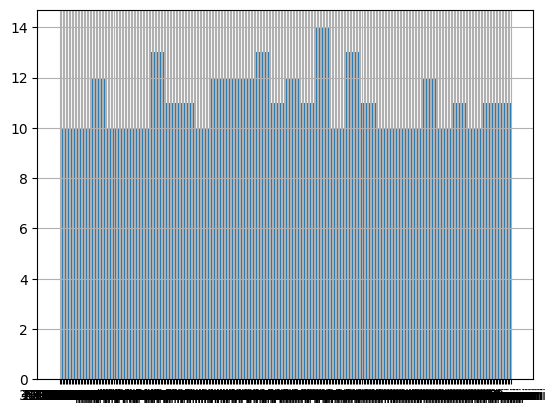

In [55]:
land_area.hist(bins=30)

In the first histogram, which concerns the land area of cities, the results are fairly evenly balanced regarding how many times the areas of cities are similar to each other at different population levels. However, it's noticeable that there are more placed toward the center of the histogram, where the land area is medium-sized compared to all the cities included in the data, which means the data is likely approximately normal.

<Axes: >

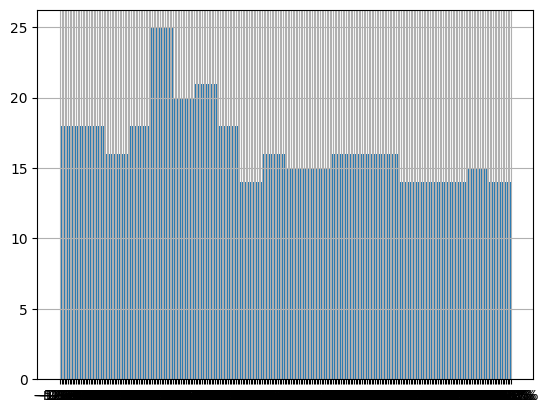

In [46]:
change.hist(bins=20)

In the second histogram, which concerns the change in population from 2020-2022, the results are more skewed to the right here as there are more instances of cities losing population instead of gaining it. This would indicate that more people are moving out of cities than into them recently, which is interesting to see.

In [47]:
from matplotlib import pyplot as plt

Before analyzing the variables together, pyplot needs to be imported from the package matplotlib to be able to use the graphs necessary for this.

Text(0.5, 1.0, 'Population Change from 2020-2022 vs. Land Area in square miles')

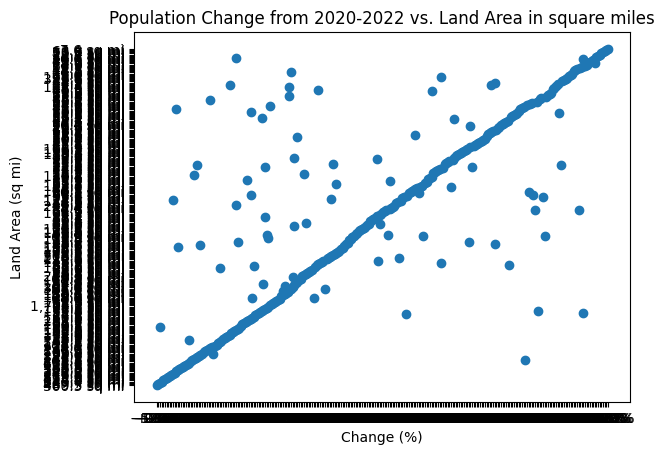

In [56]:
change_column = largest_us_cities_df["Change"]
land_area_column = largest_us_cities_df["Land Area (sq mi)"]

plt.scatter(change_column, land_area_column, marker="o")

plt.xlabel("Change (%)")
plt.ylabel("Land Area (sq mi)")

plt.title("Population Change from 2020-2022 vs. Land Area in square miles")

In order to combine the variables "Change" and "Land Area (sq mi)" together, it's best to use a scatter plot here. In it, the main trend is that as the land area of a city increases, so does the percentage of its population that doesn't leave and/or moves in. However, there also tends to be more instances where cities with greater land areas still lose more of their population than expected at the same time.